# Embeddings Neuronales


**TODO**

### Importanción de librería requeridas

In [1]:
import os

import gensim.corpora as corpora
from gensim.models import Word2Vec

from collections import Counter
import numpy as np

import pickle
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline


### Definición de variables globales

In [2]:
TEXT_FILE_READ = 'docs/preprocessing_reddit_data.csv'
TEXT_SAVE_FILE = 'docs/reddit_data_word2vec.csv'
FILENAME_PICKLE = "docs/tmpreddit.pickle"
n_clusters = 120

### Lectura de los comentarios de Reddit

Los comentarios fueron previamente preprocesados (Ver en TODO).

In [3]:
with open(FILENAME_PICKLE, 'rb') as f:
    df = pickle.load(f)


### Vocabulario

In [4]:
# Create Dictionary
id2word = corpora.Dictionary(df['lemma_tokens'])

# Filtering Extremes
id2word.filter_extremes(no_below=2, no_above=.99)

# Creating a corpus object
corpus = [id2word.doc2bow(d) for d in df['lemma_tokens']]


In [5]:
processed_corpus = df['lemma_tokens']


### Entrenamiento del modelo Word2Vec

In [6]:
model = Word2Vec(sentences=processed_corpus, vector_size=100, window=5, min_count=1, workers=4)
model.train(processed_corpus, total_examples=len(processed_corpus), epochs=100)
model.save("word2vec.model")

In [7]:
word_vecs = []
vocabulary = list(model.wv.key_to_index)

for key in model.wv.key_to_index:
    word_vecs.append(model.wv[key])

In [8]:
# algunas predicciones

model.wv.most_similar("rucula")

[('jajajajjajaajaj', 0.9476320743560791),
 ('laconcho', 0.9342326521873474),
 ('bottle', 0.9092020392417908),
 ('branding', 0.8758299350738525),
 ('submarinar', 0.8637028336524963),
 ('meanies', 0.8319029211997986),
 ('golden', 0.7513698935508728),
 ('aragorn', 0.7013515830039978),
 ('gustavo', 0.6881943345069885),
 ('rose', 0.6819429993629456)]

### Generación de vectores desde documentos

In [9]:
   
vectorized_docs = vectorize(processed_corpus, model=model)
len(vectorized_docs), len(vectorized_docs[0])



(27791, 100)

### Generación de clusters

Text(0.5, 1.0, 'Elbow curve')

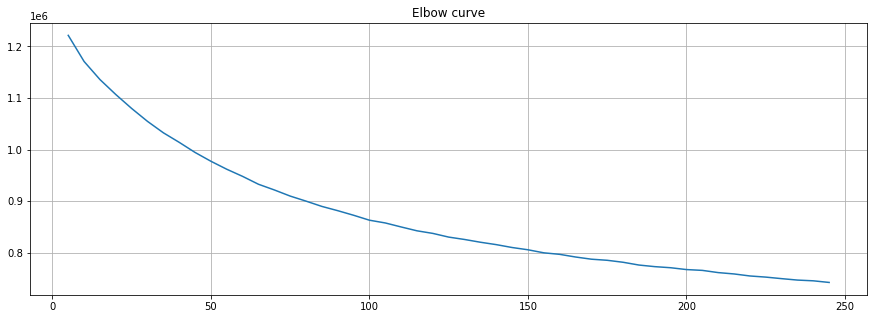

In [11]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

min = 5
max = 250
step = 5

distorsions = []
for k in range(min, max, step):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(vectorized_docs)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(min, max, step), distorsions)
plt.grid(True)
plt.title('Elbow curve')


In [12]:
clustering, cluster_labels = mbkmeans_clusters(
	X=vectorized_docs,
    k=n_clusters,
    mb=500,
    print_silhouette_values=True,
)
df_clusters = pd.DataFrame({
    "text": df["body"].values,
    "tokens": [" ".join(text) for text in processed_corpus],
    "cluster": cluster_labels
})



For n_clusters = 120
Silhouette coefficient: 0.02
Inertia:836378.8512641264
Silhouette values:
    Cluster 67: Size:96 | Avg:0.23 | Min:0.09 | Max: 0.39
    Cluster 40: Size:31 | Avg:0.14 | Min:-0.01 | Max: 0.31
    Cluster 94: Size:100 | Avg:0.13 | Min:-0.08 | Max: 0.33
    Cluster 66: Size:79 | Avg:0.12 | Min:-0.03 | Max: 0.32
    Cluster 104: Size:87 | Avg:0.12 | Min:-0.09 | Max: 0.35
    Cluster 13: Size:126 | Avg:0.11 | Min:-0.14 | Max: 0.39
    Cluster 45: Size:184 | Avg:0.11 | Min:-0.14 | Max: 0.34
    Cluster 36: Size:282 | Avg:0.11 | Min:-0.11 | Max: 0.35
    Cluster 12: Size:134 | Avg:0.11 | Min:-0.07 | Max: 0.35
    Cluster 99: Size:122 | Avg:0.10 | Min:-0.11 | Max: 0.34
    Cluster 46: Size:137 | Avg:0.10 | Min:-0.10 | Max: 0.36
    Cluster 98: Size:97 | Avg:0.10 | Min:-0.10 | Max: 0.36
    Cluster 81: Size:1821 | Avg:0.10 | Min:0.02 | Max: 0.20
    Cluster 116: Size:100 | Avg:0.10 | Min:-0.14 | Max: 0.33
    Cluster 4: Size:148 | Avg:0.10 | Min:-0.06 | Max: 0.34
    Cluste

### *Top terms* por cluster (basado en los centroides de los clusters)

In [13]:
print("Most representative terms per cluster (based on centroids):")
for i in range(n_clusters):
    tokens_per_cluster = ""
    most_representative = model.wv.most_similar(positive=[clustering.cluster_centers_[i]], topn=5)
    for t in most_representative:
        tokens_per_cluster += f"{t[0]} "
    print(f"Cluster {i}: {tokens_per_cluster}")



Most representative terms per cluster (based on centroids):
Cluster 0: querer semanito agradar nisiquierir subsecretacer 
Cluster 1: volver hecatombe depresión primitivo estafodoro 
Cluster 2: esperar garcado yankies 🗡 \^=˃ᆺ˂ 
Cluster 3: pasar todo~~ naao mimiiiir manejar 
Cluster 4: ganar ioooooo views seguidas holomodor 
Cluster 5: incumplimento pedrida\ \*supermercado \*quilombo 1900-2001 
Cluster 6: agua babality calientenla 2min desperdicien 
Cluster 7: ah macri bowie ionizante portado 
Cluster 8: casa recondito visibilizar boda auto 
Cluster 9: buscar fundacion derpixon politiqueer sugar 
Cluster 10: venir barbero 6_més bezar semana 
Cluster 11: wage pandemic jajjajjaaa ss hablandono 
Cluster 12: milei bregmar xdxdxd javier lacunza 
Cluster 13: amigo migalar amiga chonga adulador 
Cluster 14: comer detox naaaaaah misogino cultivar 
Cluster 15: .ivar namastir had result think 
Cluster 16: mano pehuenia arquitectura agonir caviahue 
Cluster 17: él pandemic wage ss mishandling 
Clus

### *Top terms* por cluster (basado en las palabras más frecuentes)

In [14]:
for i in range(n_clusters):
    tokens_per_cluster = ""
    most_frequent = Counter(" ".join(df_clusters.query(f"cluster == {i}")["tokens"]).split()).most_common(5)
    for t in most_frequent:
        tokens_per_cluster += f"{t[0]}({str(t[1])}) "
    print(f"Cluster {i}: {tokens_per_cluster}")


Cluster 0: querer(262) él(21) pasar(9) seguir(7) matar(7) 
Cluster 1: volver(95) año(9) probar(5) gente(4) pasar(4) 
Cluster 2: esperar(138) año(8) él(7) respuesta(5) seguro(4) 
Cluster 3: pasar(263) él(10) nivel(10) jajaja(6) llegar(6) 
Cluster 4: ganar(162) elección(12) noviembre(8) perder(7) voto(6) 
Cluster 5: nacional(57) terrorista(40) él(33) mapuch(30) país(28) 
Cluster 6: agua(87) ver(7) él(6) aguo(5) mandar(5) 
Cluster 7: ah(71) macri(67) pacer(5) cristina(5) peroncho(5) 
Cluster 8: casa(156) él(16) dar(6) volver(6) barrio(6) 
Cluster 9: buscar(156) él(14) laburo(10) gente(9) encontrar(7) 
Cluster 10: venir(196) año(17) semana(12) él(5) pasar(5) 
Cluster 11: él(73) cosa(55) servir(50) entender(46) cambiar(45) 
Cluster 12: milei(150) espert(18) votar(9) él(8) decir(6) 
Cluster 13: amigo(135) pasar(4) jajajaja(4) ver(3) él(3) 
Cluster 14: comer(162) él(27) comida(12) gente(10) polenta(8) 
Cluster 15: ⠀(685) to(83) you(80) and(65) is(42) 
Cluster 16: mano(104) él(6) carajo(5) dar

### Recupere los documentos más representativos (basados en los centroides de los clústeres) para un cluster en particular

In [15]:
test_cluster = 22
most_representative_docs = np.argsort(
    np.linalg.norm(vectorized_docs - clustering.cluster_centers_[test_cluster], axis=1)
)
for d in most_representative_docs[:10]:
    print( df["body"].values[d])
    print("-------------")

Tambien conocido como el billete de Schrödinger.. Está impreso y no lo está, hasta que se gasta para aumentar el PBI en un ciclo magico de bonanza multiplicadora de ~~panes~~
-------------
Cada Macri es un shotcito de tequila
-------------
Sanguijuelas mas grandes no puede haber
-------------
Hasta la recompensa esta devaluada hajaja 17mil usd? Mi viiiida
-------------
Entendí, entonces el dólar sube porque el gobierno quiere que el peso valga, entonces me tengo que poner feliz y confiar. Me lo dice un señor que cobra en pesos. Esperame lo anoto en el ticket del super.
-------------
Imagínate unos botines del Relámpago Marquinhos
-------------
16 Años imposible bro, pero un préstamo grande y bien invertido en cryptos ahora, si el bull market sigue te puede dar altísimos beneficios y la posibilidad de devolver el préstamo rápido. Btc, Eth o Sol.
-------------
Denle al presi con la cinturonga
-------------
Abrió importaciones mientras hizo polvo una hiperinflación dejandola en 1 dígito (

In [16]:
#solo test
#print(len(vectorized_docs))
#print(vectorized_docs[0])

test_v = vectorize([['defender', 'peso', 'siente', 'corazón', 'compro', 'pesos', 'tasa', 'fijo', 'año']], model=model)
prediction = clustering.predict(test_v)
print(prediction)

ver = "['defender', 'peso', 'siente', 'corazón', 'compro', 'pesos', 'tasa', 'fijo', 'año']"
ver = "tapastir baño tirar balde aguo"
test_v = vectorize([ver], model=model)
prediction = clustering.predict(test_v)
print(prediction)


str2 = ver.split(" ")
print(str2)

[22]
[110]
['tapastir', 'baño', 'tirar', 'balde', 'aguo']


In [17]:
reddit = pd.read_csv(TEXT_FILE_READ)

from sklearn.metrics import pairwise_distances


def get_cluster(row):
    test_v = vectorize([str(row).split(" ")], model=model)
    #print('****************')
    #print(clustering.fit_predict(test_v, 1))
    #print(clustering.predict(test_v))
    return clustering.predict(test_v)

reddit['cluster'] = reddit.apply(lambda row: get_cluster(row['body_preprocessing']) , axis = 1) 


In [18]:
# Show
reddit.head(10)

,score,id,flair,comms_num,body,comment_parent_id,is_replay,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,lemma_tokens,body_preprocessing,cluster
0,1,hfw14mt,Discusion🧐,1,todo para decir que tapaste el baño. tira un b...,q44kw3,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['tapastir', 'baño', 'tirar', 'balde', 'aguo']",tapastir baño tirar balde aguo,[100]
1,1,hfw41eh,Discusion🧐,0,"sopapa primero master, si hay tapón te vas a t...",hfw14mt,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['sopapa', 'master', 'tapón', 'va', 'teñir', '...",sopapa master tapón va teñir medio,[112]
2,1,hfw1ao2,Discusion🧐,0,"Usas la sopapa, o tiras agua caliente con un b...",q44kw3,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['sopapo', 'tira', 'agua', 'caliente', 'balde']",sopapo tira agua caliente balde,[6]
3,1,hfw3jof,Discusion🧐,2,Lo que he probado que siempre me dio resultado...,q44kw3,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['probado', 'resultado', 'sellar', 'boca', 'in...",probado resultado sellar boca inodoro tirar ca...,[28]
4,1,hfw6v4i,Discusion🧐,0,Estas cobrando por dar mantenimiento y no sabe...,q44kw3,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['cobrar', 'mantenimiento', 'carajo', 'kjjjjjj...",cobrar mantenimiento carajo kjjjjjjjjj vivirio...,[19]
5,1,hfw26iv,Discusion🧐,0,"Si tenes algo con punta, metelo y hace un poco...",q44kw3,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['tén', 'punto', 'metelo', 'fuerza', 'romper',...",tén punto metelo fuerza romper tapo baño tirar...,[6]
6,1,hfw2gof,Discusion🧐,1,"Con una manguera para regar el jardín, si tene...",q44kw3,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['regar', 'jardín', 'tén', 'pod', 'probar']",regar jardín tén pod probar,[90]
7,1,hfw5s13,Discusion🧐,0,"despues regas el jardin y se lava sola, solo q...",hfw2gof,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['rega', 'jardin', 'lava', 'tenés', 'lavarte',...",rega jardin lava tenés lavarte mano pulgar chorro,[16]
8,1,hfw3air,Discusion🧐,0,La respuesta real es que se venden unos caños ...,q44kw3,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['respuesta', 'real', 'vender', 'caño', 'alamb...",respuesta real vender caño alambrado decir cañ...,[20]
9,7,hfvxa6w,Discusion🧐,3,Mi alfajor favorito es el Havana,q443eo,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['alfajor', 'favorito', 'haván']",alfajor favorito haván,[55]


In [19]:
reddit.to_csv(TEXT_SAVE_FILE, index=False)

In [ ]:
cluster_path = 'docs/test/lda_comments_per_cluster/'

for i in range(n_clusters):
    reddit[(reddit["cluster"] == i)][['flair', 'body']].to_csv(test_path + str(i) + '.csv')
